In [4]:
%load_ext autoreload
%autoreload 2
import sys

path = "C:/Users/schiavaz/lava-nc/depth/"
sys.path.append(path)

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
import cv2 as cv
import open3d as o3d
from tqdm import tqdm

import events_utils.filter as flt
import events_utils.visualize as vis
import events_utils.time_difference as td
import events_utils.time_difference_2d as td2d
import events_utils.tum_vie as tum_dset

from scipy.spatial.transform import Rotation as R

import semd2d_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [5]:
events = np.loadtxt(path + "/data/slider-depth/events.txt")
# this data is already filtered by time, no need to redo it here

In [6]:
events = flt.filter_time(events, 0.5, 0.6)

In [7]:
# use only the specified patch of input events
patch_center = (90, 120)
patch_size = 180
events = semd2d_utils.filter_patch(events, patch_center, patch_size)

data_steps = 50 # timesteps to divide the data into
sim_steps = 50 # simulation steps
shape = (patch_size, patch_size)
t_start = events[0, 0]
duration = events[-1, 0] - events[0, 0]

In [12]:
args = {
    "shape":shape,
    "conv_shape": (2, 2),
    "conv_stride": (2, 2),
    "thresh_conv": 0.5,
    "detector_du": 0.1
}
data, data_u = semd2d_utils.run_sim(args, events, data_steps, sim_steps)

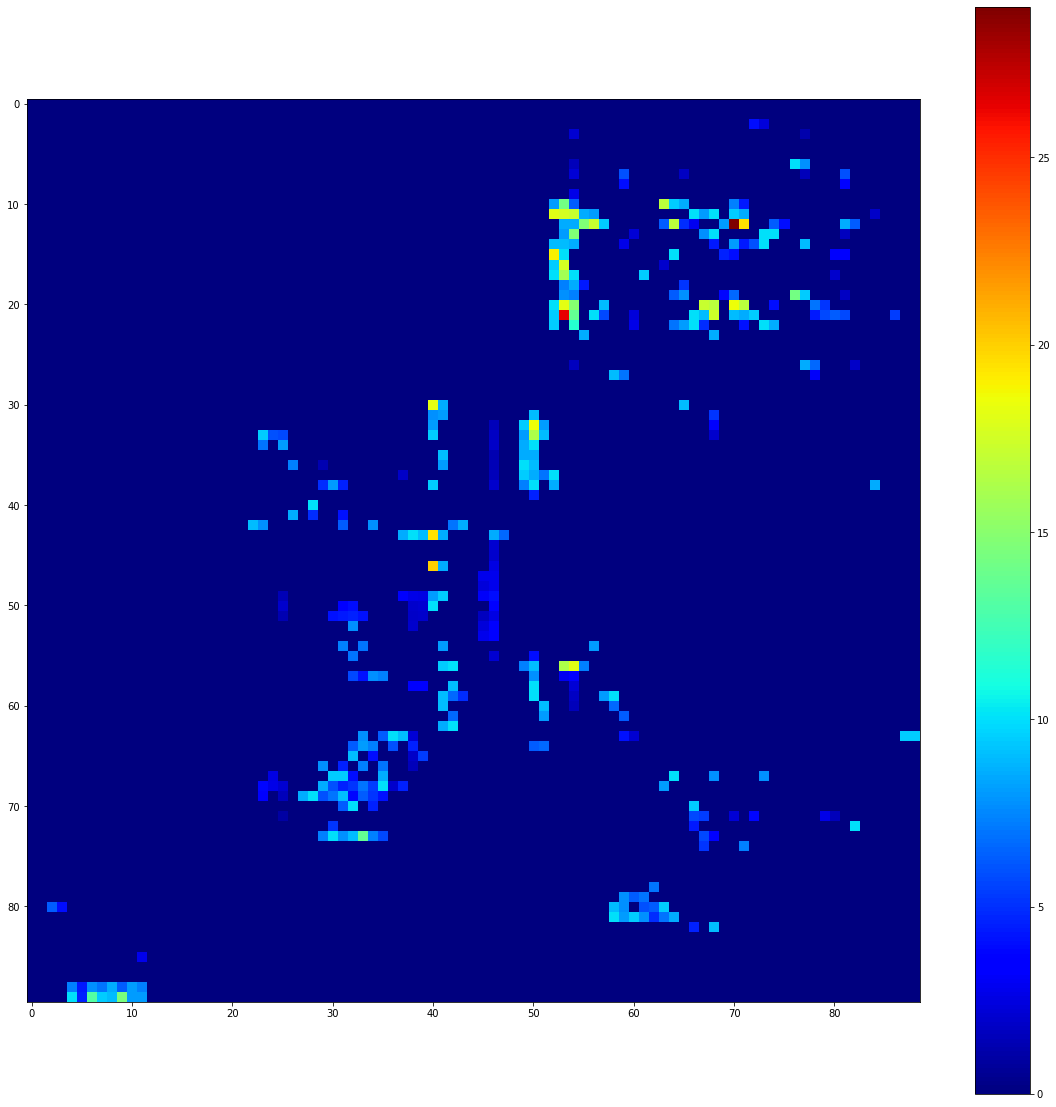

In [13]:
%matplotlib inline
plt.figure(figsize=(20, 20))
m = plt.imshow(np.delete(np.sum(data, axis=-1), 0, 1), cmap="jet")
plt.colorbar(m)

In [14]:
d = data_u["Process_0"]["u"]

KeyError: 'Process_0'

In [ ]:
plt.figure(figsize=(20, 20))
m = plt.imshow(np.delete(np.sum(d, axis=-1), 0, 1), cmap="jet")
plt.colorbar(m)